# Data collection 

Collecting the relevant datasets to explore our problem

We want to explore how the features of roads and roads conditions have an impact on the severity of road accidents in Philadelphia. 

By learning what road features have the greatest impact on the severity of accidents we can provide suggestions on how roads can be redesigned in order to reduce the severity of accidents. 

In [46]:
import pandas as pd


crash_flag = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_flag_variables.csv')


In [30]:
crash_general = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_general.csv')


C:\Users\ekmho\AppData\Local\Temp\ipykernel_16720\3111603682.py:1: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_general = pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_general.csv')


In [3]:
crash_roadway =  pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_roadway.csv')


C:\Users\ekmho\AppData\Local\Temp\ipykernel_16720\2030635114.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_roadway =  pd.read_csv('C:/Users/ekmho/Documents/GitHub/Europe Regional 2023 Datasets/Crashes/crash_info_roadway.csv')


<b> Looking at the shapes of the datasets </b>

In [4]:
crash_roadway.shape
#It is expected that there are more roads than crashes becasue crashes might happen at the interection of some roads

(232152, 13)

In [31]:
crash_general.shape

(133013, 101)

In [48]:
crash_flag.shape

(133013, 111)

In [6]:
#Looking at the number of unique CRN codes to determine whether crash_general contains only one row per crash
num_unique_values = crash_general['CRN'].nunique()
num_unique_values

#This shows that every row in the crash_general dataset relates to a unique instance of a crash

133013

In [7]:
crash_people.shape

#Looking at the number of rows for the crash_people dataset it is expected that 
#it would have more rows than the total number of crashes over the time period because 
#multiple people are involved in a crash

(370877, 27)

What can be infered from this is that for every crash there is a one to many relationship with both roads and people. 

Firstly for each dataset the relevant features relating to the roads themselves and their conditions will be collected from every dataset. 



# Data Cleaning  

Here the relevant datasets will be merged and examined to remove missing variables and so on. 


<b> Dropping irrelevant columns from all the dataframes </b>

In [32]:
general_col_keep = ['CRASH_MONTH', 'CRASH_YEAR', 'CRN', 'DEC_LAT', 'DEC_LONG', 
                    'ILLUMINATION', 'INTERSECT_RELATED','INTERSECT_TYPE','LANE_CLOSED', 'LN_CLOSE_DIR', 'LOCATION_TYPE',
                   'RDWY_SURF_TYPE_CD', 'ROAD_CONDITION', 'TRD_FUNC_CD', 'TCD_TYPE', 'WEATHER1', 'MAX_SEVERITY_LEVEL']

crash_general = crash_general.drop(columns=[col for col in crash_general.columns if col not in general_col_keep])

In [9]:
roadway_col_keep = ['CRN', 'LANE_COUNT', 'SPEED_LIMIT', 'OFFSET', 'RDWY_SEQ_NUM']

crash_roadway = crash_roadway.drop(columns=[col for col in crash_roadway.columns if col not in roadway_col_keep])

In [10]:
person_col_keep = ['CRN', 'DVR_PED_CONDITION', 'PERSON_TYPE']

crash_people = crash_people.drop(columns=[col for col in crash_people.columns if col not in person_col_keep])

In [11]:
#Only having people who are apparently normal - this is to ensure that 
#it is only road features and conditions which are impacting the crash severity

crash_people = crash_people[crash_people['DVR_PED_CONDITION'] == 1]

crash_people

,CRN,DVR_PED_CONDITION,PERSON_TYPE
10,2022000036,1.0,1.0
128,2022003813,1.0,1.0
130,2022003813,1.0,1.0
206,2021000028,1.0,1.0
207,2021000089,1.0,2.0
...,...,...,...
370716,2014068601,1.0,2.0
370751,2014104631,1.0,2.0
370755,2014106789,1.0,1.0
370809,2014087989,1.0,1.0


In [22]:
#Getting the list of crashes where the person was in a normal state
normal_state_crn = crash_people['CRN'].unique()

len(normal_state_crn)

5918

In [13]:
crash_roadway = crash_roadway[crash_roadway['CRN'].isin(normal_state_crn)]
crash_roadway

,CRN,RDWY_SEQ_NUM,OFFSET,LANE_COUNT,SPEED_LIMIT
44,2019024685,3,131.0,4.0,45.0
49,2019098041,3,474.0,2.0,35.0
60,2019032428,3,446.0,2.0,25.0
66,2019050505,3,57.0,4.0,55.0
78,2019062777,6,NaN,2.0,35.0
...,...,...,...,...,...
231981,2014049590,3,1246.0,2.0,30.0
232067,2015006634,6,NaN,1.0,25.0
232071,2015015582,4,NaN,1.0,NaN
232138,2015001510,3,2357.0,2.0,25.0


In [33]:
crash_general = crash_general[crash_general['CRN'].isin(normal_state_crn)]
crash_general

,CRN,CRASH_MONTH,CRASH_YEAR,DEC_LAT,DEC_LONG,ILLUMINATION,INTERSECT_TYPE,LANE_CLOSED,LN_CLOSE_DIR,LOCATION_TYPE,MAX_SEVERITY_LEVEL,RDWY_SURF_TYPE_CD,ROAD_CONDITION,TCD_TYPE,WEATHER1
43,2010008992,1,2010,39.9600,-75.1800,3.0,0,2,3.0,0,4,NaN,1,0,3
60,2010010428,1,2010,39.9325,-75.2000,3.0,0,1,4.0,0,0,NaN,1,0,3
70,2010011506,1,2010,40.0732,-75.1894,3.0,0,1,1.0,0,0,NaN,1,2,3
101,2010011581,1,2010,39.9080,-75.1732,3.0,1,0,NaN,0,8,NaN,9,3,7
116,2010011618,1,2010,39.9538,-75.2408,3.0,0,0,NaN,0,0,NaN,9,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132889,2022005014,12,2021,39.9438,-75.1427,3.0,0,0,NaN,0,3,NaN,1,0,3
132903,2022006555,11,2021,39.9699,-75.1255,3.0,7,2,1.0,2,8,NaN,1,0,3
132920,2022010813,12,2021,40.0101,-75.1362,1.0,1,2,1.0,0,1,2.0,1,2,4
132963,2022014503,7,2021,39.9489,-75.2171,3.0,0,2,4.0,0,0,NaN,1,0,3


In [15]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [34]:
#Looking at the NAN counts for each column
nan_counts = crash_general.isna().sum()
print(nan_counts)

CRN                      0
CRASH_MONTH              0
CRASH_YEAR               0
DEC_LAT                 26
DEC_LONG                26
ILLUMINATION             0
INTERSECT_TYPE           0
LANE_CLOSED              0
LN_CLOSE_DIR          3570
LOCATION_TYPE            0
MAX_SEVERITY_LEVEL       0
RDWY_SURF_TYPE_CD     5839
ROAD_CONDITION           0
TCD_TYPE                 0
WEATHER1                 0
dtype: int64


In [36]:
#Removing the NaN values
crash_locations = crash_general.dropna(subset=['DEC_LAT', 'DEC_LONG'])

crash_locations

,CRN,CRASH_MONTH,CRASH_YEAR,DEC_LAT,DEC_LONG,ILLUMINATION,INTERSECT_TYPE,LANE_CLOSED,LN_CLOSE_DIR,LOCATION_TYPE,MAX_SEVERITY_LEVEL,RDWY_SURF_TYPE_CD,ROAD_CONDITION,TCD_TYPE,WEATHER1
43,2010008992,1,2010,39.9600,-75.1800,3.0,0,2,3.0,0,4,NaN,1,0,3
60,2010010428,1,2010,39.9325,-75.2000,3.0,0,1,4.0,0,0,NaN,1,0,3
70,2010011506,1,2010,40.0732,-75.1894,3.0,0,1,1.0,0,0,NaN,1,2,3
101,2010011581,1,2010,39.9080,-75.1732,3.0,1,0,NaN,0,8,NaN,9,3,7
116,2010011618,1,2010,39.9538,-75.2408,3.0,0,0,NaN,0,0,NaN,9,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132889,2022005014,12,2021,39.9438,-75.1427,3.0,0,0,NaN,0,3,NaN,1,0,3
132903,2022006555,11,2021,39.9699,-75.1255,3.0,7,2,1.0,2,8,NaN,1,0,3
132920,2022010813,12,2021,40.0101,-75.1362,1.0,1,2,1.0,0,1,2.0,1,2,4
132963,2022014503,7,2021,39.9489,-75.2171,3.0,0,2,4.0,0,0,NaN,1,0,3


Visualising the distribution of accidents not caused by driver condition

In [37]:
import folium
from folium.plugins import HeatMap

# Create a map centered on Philadelphia
map_center = [39.9526, -75.1652]
crash_map = folium.Map(location=map_center, zoom_start=10)

# Create a list of coordinates from the crash data
crash_locations = crash_locations[['DEC_LAT', 'DEC_LONG']].values.tolist()

# Create a heatmap layer from the coordinates
heatmap_layer = HeatMap(crash_locations)

# Add the heatmap layer to the map
heatmap_layer.add_to(crash_map)

# Display the map
crash_map

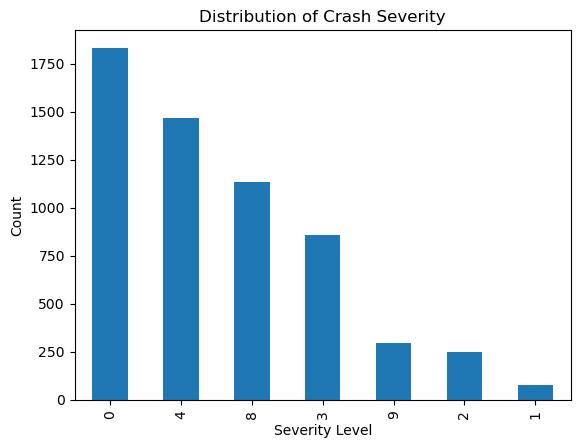

In [44]:
import matplotlib.pyplot as plt

severity_counts = crash_general['MAX_SEVERITY_LEVEL'].value_counts()
severity_counts.plot(kind='bar')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Distribution of Crash Severity')
plt.show()